<h1><center> Projeto #1 - Análise Exploratória de Dados </center></h1>

Arquivo retirado da base kaglle.com
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

contém taxas de suicídio no mundo. informações retiradas de diversos portais conforme link acima


In [103]:
import matplotlib.pyplot as plt # visualização de dados
import seaborn as sns # visualização de dados

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.metrics import accuracy_score

In [104]:
#leitura da base de dados
df = pd.read_csv("master.csv")


In [105]:
#verificando os 5 primeiros registros da base e cabeçalhos
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [106]:
#REALIZANDO SANEAMENTO DOS CABEÇALHOS

df.drop(columns=['HDI for year'], inplace=True)
#SUICIDES_NO = NUMEROS DE SUICIDOS
#FALTA TROCAR NOMES DAS COLUNAS...

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [107]:
#QUAL O TAMANHO DA NOSSA BASE?
print('Número de linhas e número de colunas:', df.shape)

Número de linhas e número de colunas: (27820, 11)


In [108]:
#  VERIFICAR TIPOS DE DADOS DE CADA FEATURE
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

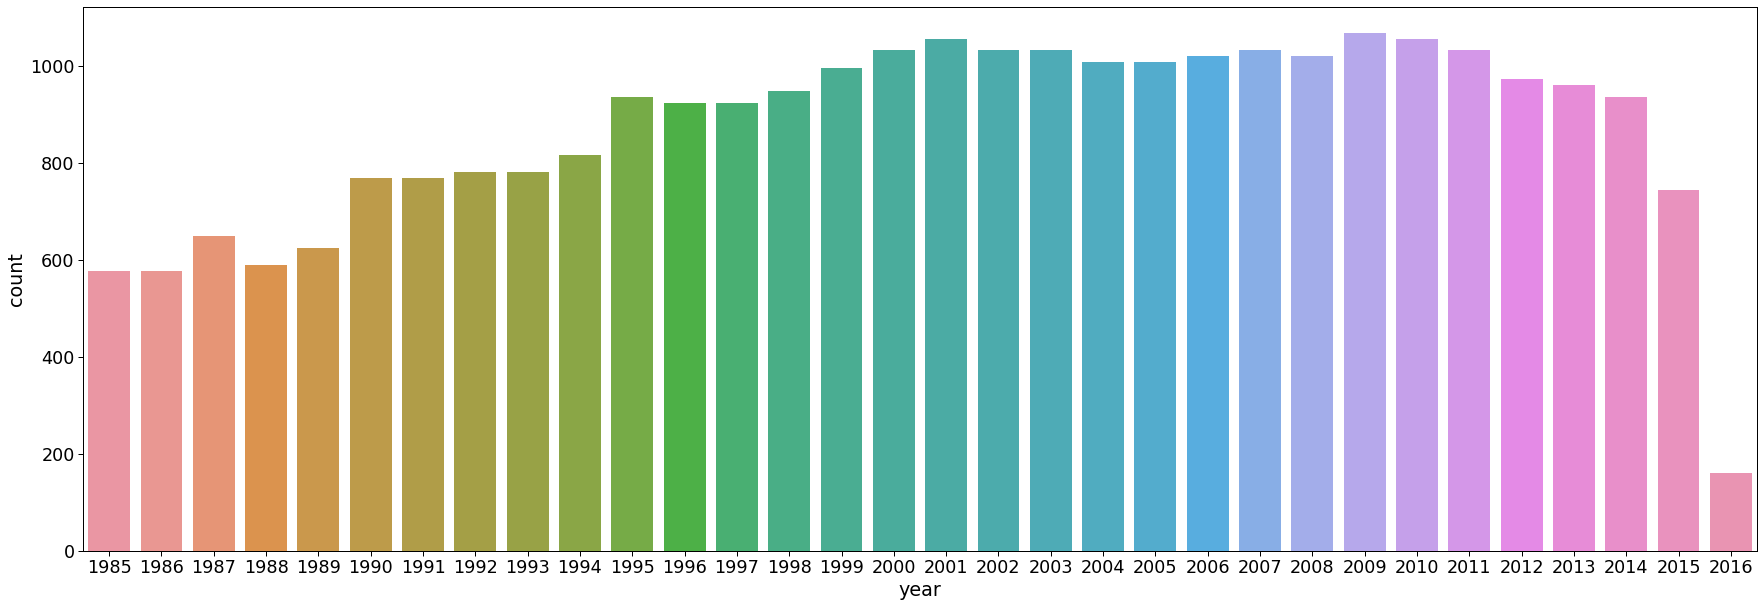

In [109]:
#quantidade de registros por ano
plt.figure(figsize=(30,10))
y = df['year']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='count')

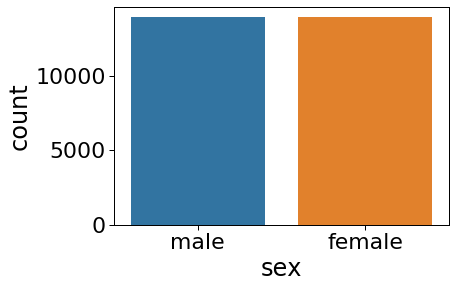

In [110]:
y = df['sex']
sns.set_context("paper", 2.5, {"lines.linewidth":4})
sns.countplot(y,label='count')

In [117]:
#SUICIDOS POR SEXO E FAIXA DE IDADE
suicides_sex_age = df[['sex', 'age', 'suicides/100k pop']].groupby(['sex', 'age']).mean()
suicides_sex_age

suicides/100k pop
sex    age                           
female 15-24 years           4.328018
       25-34 years           4.573210
       35-54 years           5.916480
       5-14 years            0.462252
       55-74 years           7.123447
       75+ years             9.919802
male   15-24 years          13.566290
       25-34 years          19.800560
       35-54 years          23.978402
       5-14 years            0.777831
       55-74 years          25.187712
       75+ years            37.991017

In [118]:
# Reorder age index for visualization.
suicides_sex_age.reset_index(inplace=True)
suicides_sex_age['age'] = suicides_sex_age['age'].str.replace(' years', '')

age_sort = {'5-14': 0, '15-24': 1, '25-34': 2, '35-54': 3, '55-74': 4, '75+': 5}
suicides_sex_age['sort'] = suicides_sex_age['age'].map(age_sort)
suicides_sex_age.sort_values(by='sort', inplace=True)
suicides_sex_age.drop('sort', axis=1, inplace=True)

suicides_sex_age

,sex,age,suicides/100k pop
3,female,5-14,0.462252
9,male,5-14,0.777831
0,female,15-24,4.328018
6,male,15-24,13.566290
1,female,25-34,4.573210
7,male,25-34,19.800560
2,female,35-54,5.916480
8,male,35-54,23.978402
4,female,55-74,7.123447
10,male,55-74,25.187712


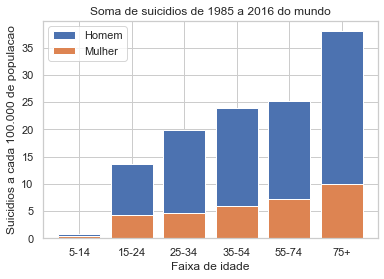

In [123]:
age_groups = suicides_sex_age['age'].unique()
male_suicides = suicides_sex_age[suicides_sex_age['sex'] == 'male']['suicides/100k pop']
female_suicides = suicides_sex_age[suicides_sex_age['sex'] == 'female']['suicides/100k pop']

plt.bar(age_groups, male_suicides, label='Homem')
plt.bar(age_groups, female_suicides, label='Mulher')

plt.title('Soma de suicidios de 1985 a 2016 do mundo')
plt.xlabel('Faixa de idade')
plt.ylabel('Suicidios a cada 100.000 de populacao')
plt.legend()
plt.show()

In [ ]:
#CONCLUSÃO